In [1]:
import torch
from torchvision.transforms import transforms
from torchvision import models

from PIL import Image
from IPython.display import Image as I

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Load the saved weights
model = torch.load("../models/model.pth")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
def predict_image(model, image_path):
    img_height = 224
    img_width = 224

    class_names = ['aalu chop', 'bara', 'bhatmas sadeko', 'biryani', 'buff curry', 'chatamari', 'chhoila', 'chhurpi', 'chicken curry', 'chow mein', 'dalbhat', 'dhau(yogurt)', 'dhido', 'gajar ko halwa', 'gundruk', 'jeri(jalebi)', 'kakro ko achar', 'khaja set', 'khapse', 'kheer', 'kodo ko roti', 'kwati', 'laphing', 'lassi', 'momos', 'pani puri', 'phini roti', 'samosa', 'sekuwa', 'selroti', 'sisnu soup', 'sukuti', 'thukpa', 'yomari']
    
    # Load and preprocess the image
    transform = transforms.Compose(
        [transforms.Resize((img_height, img_width)),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension

    # Move the image to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image = image.to(device)

    # Make predictions
    model.eval()
    with torch.no_grad():
        predictions = model(image)

    # Convert predictions to probabilities
    probs = torch.nn.functional.softmax(predictions[0], dim=0)

    # Get the predicted class index and confidence
    predicted_class_idx = torch.argmax(probs).item()
    confidence = 100 * probs[predicted_class_idx].item()

    # Return the result
    result = {
        "predicted_class": class_names[predicted_class_idx],
        "confidence": confidence
    }
    return result

This image most likely belongs to momos with a 97.38% confidence.


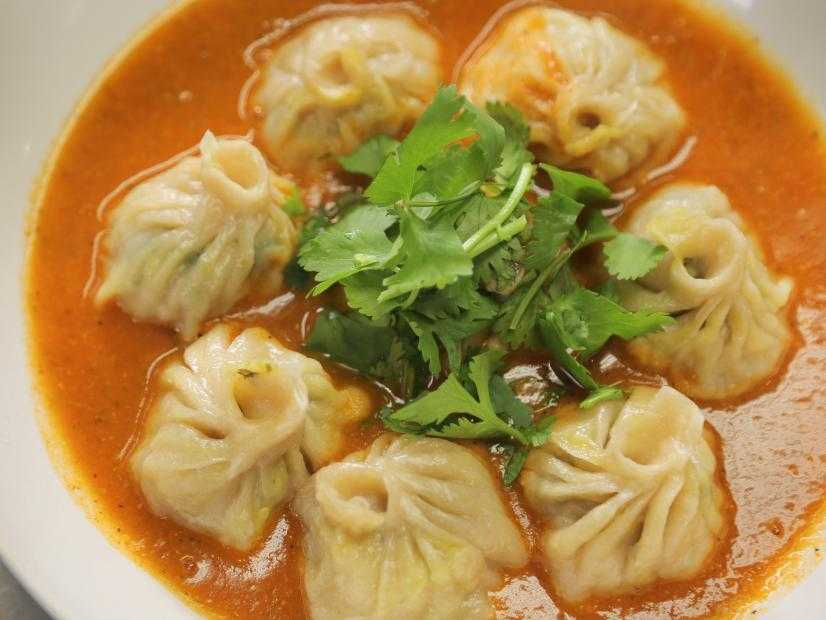

In [5]:
# Example usages
img_path = "../images/test1.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to dalbhat with a 99.80% confidence.


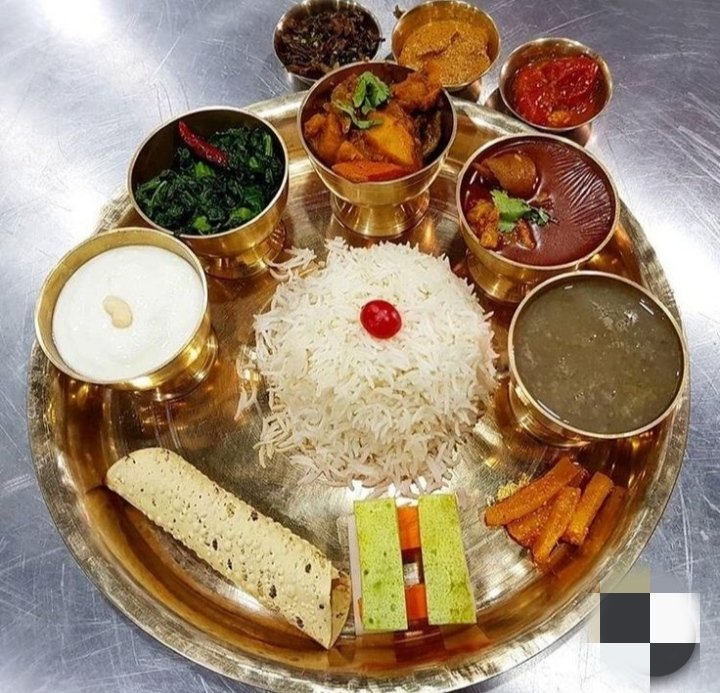

In [6]:
# Example usages
img_path = "../images/test2.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to selroti with a 99.97% confidence.


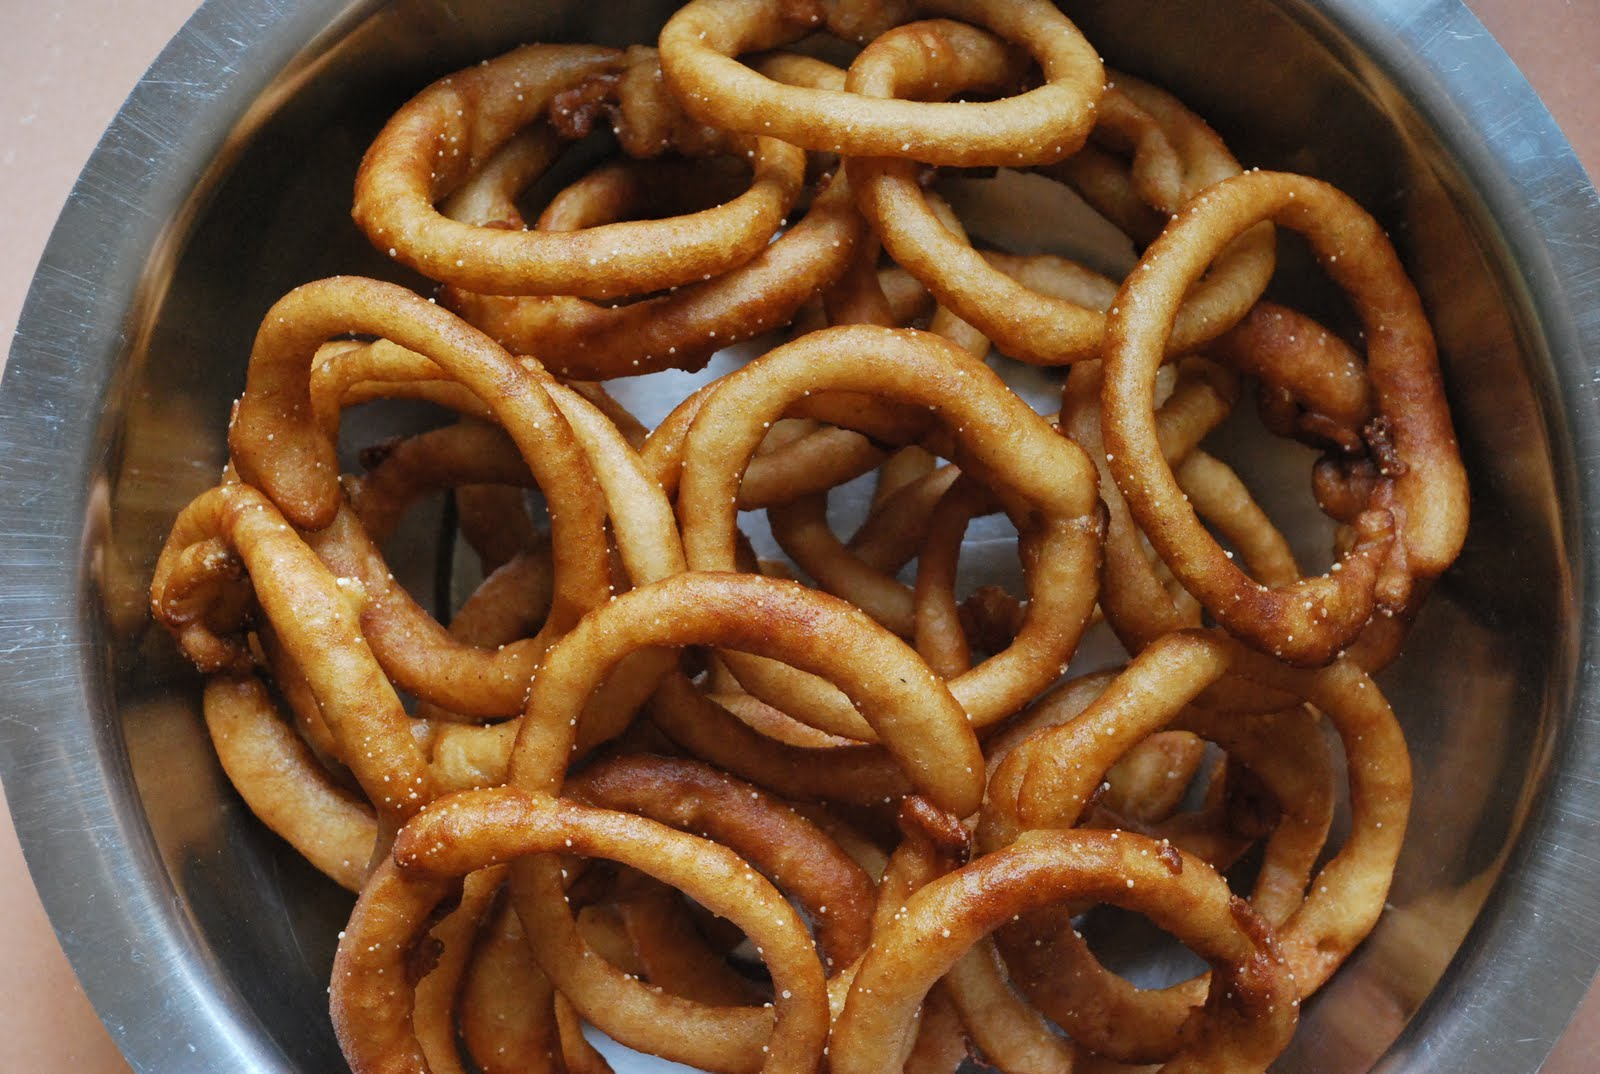

In [7]:
# Example usages
img_path = "../images/test3.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to samosa with a 99.86% confidence.


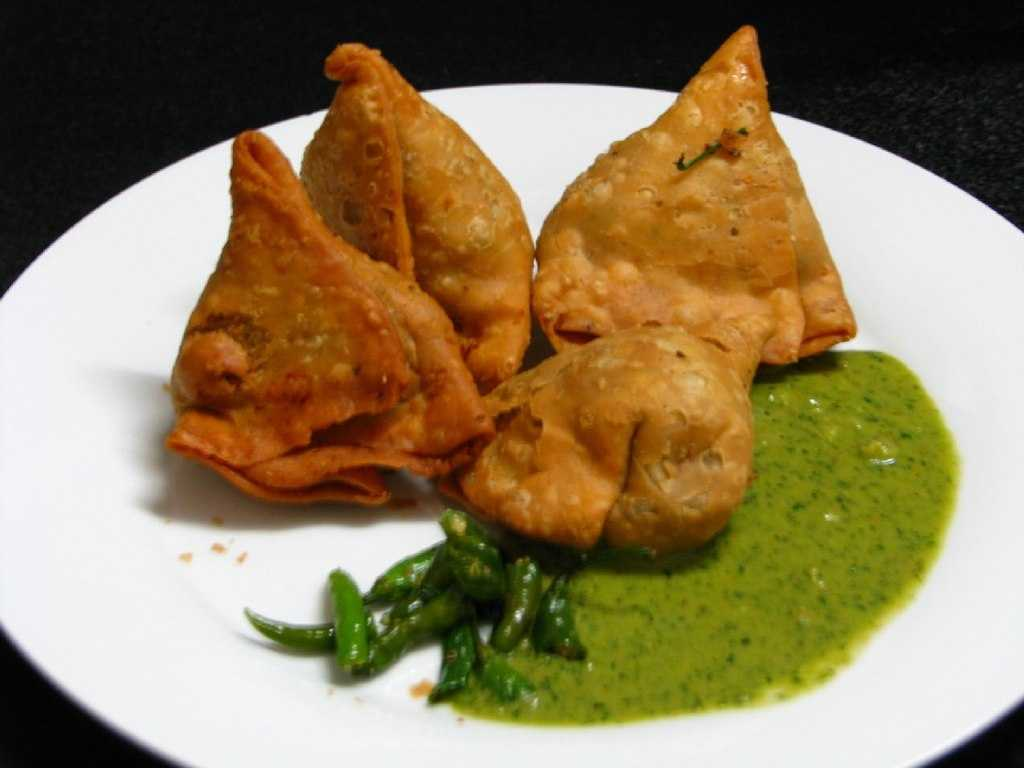

In [8]:
# Example usages
img_path = "../images/test4.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to sekuwa with a 54.07% confidence.


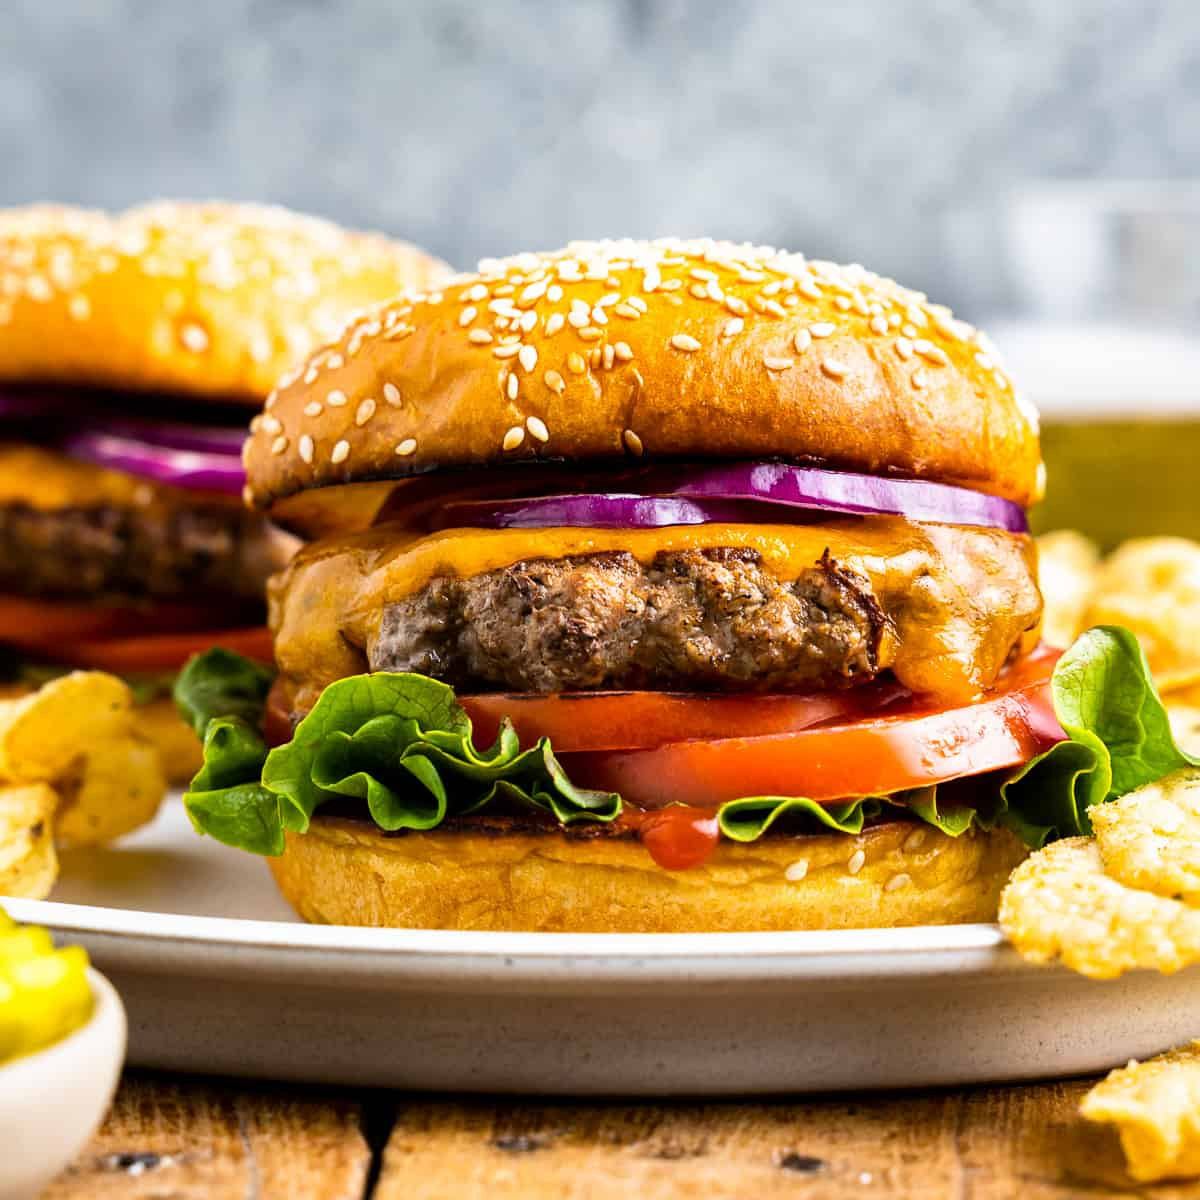

In [9]:
# Let's try with food that is not a category (Burger)
img_path = "../images/test5.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to kodo ko roti with a 42.70% confidence.


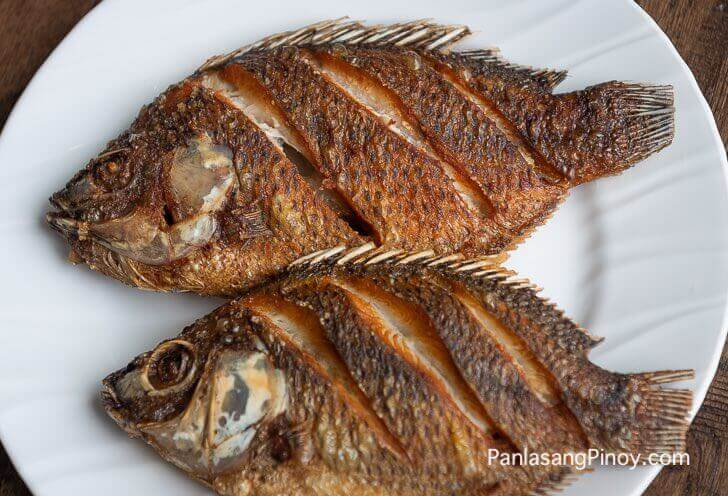

In [10]:
# Let's try with food that is not a category (Fish Fried)
img_path = "../images/test6.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to khaja set with a 86.61% confidence.


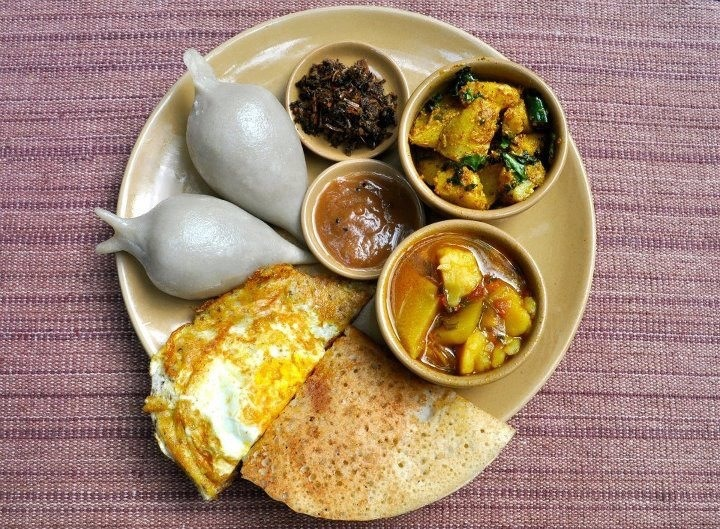

In [11]:
# Lastly try with combined food in one plate
img_path = "../images/test7.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)

This image most likely belongs to khaja set with a 75.57% confidence.


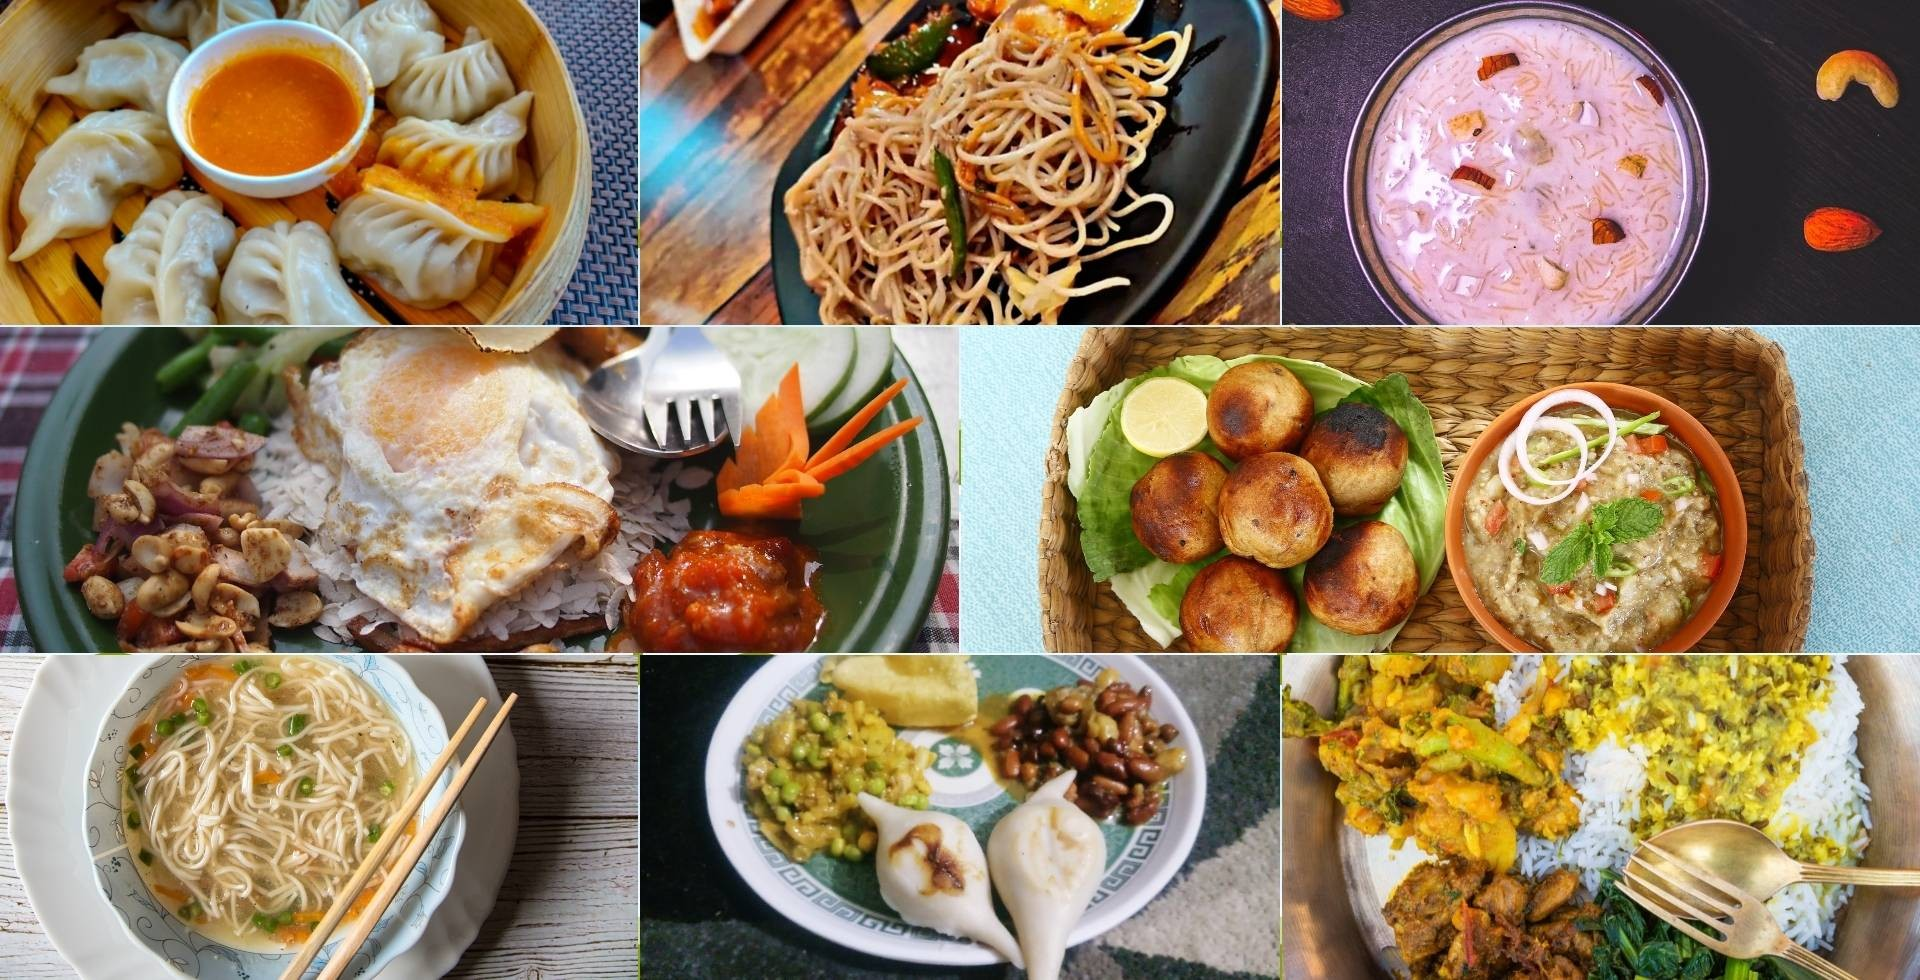

In [12]:
# Lastly try with combined food (different picture combined together)
img_path = "../images/test8.jpg"
prediction_result = predict_image(model, img_path)

print(f"This image most likely belongs to {prediction_result['predicted_class']} with a {prediction_result['confidence']:.2f}% confidence.")
I(filename = img_path, width=400, height=200)